In [1]:
#coding:utf-8
import tushare as ts
from datetime import datetime,timedelta
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
%matplotlib inline

In [3]:
market_today = ts.get_today_all()

[Getting data:]############################################################

In [4]:
by_amount = market_today.sort_values(by = 'amount',ascending = False)[:300]
by_percent = market_today.sort_values(by = 'changepercent',ascending = False)[:300]

In [5]:
all_stock = ts.get_stock_basics()

In [27]:
industry_list = list(all_stock['industry'])
industry = set(industry_list)
#print(len(industry))
#print(industry)

In [6]:
def count_industry(information):
    industry_list = []
    for i in list(information['code']):
        industry = all_stock[all_stock.index == i]['industry'].values
        industry_list.append(list(industry)[0])
    count_basic = []
    for i in industry_list:
        if i not in count_basic:
            count_basic.append(i)

    count_dict2= {}
    for i in count_basic:
        count = industry_list.count(i)
        count_dict2[i] = count
    return count_dict2

In [28]:
all_industry = {}
for i in industry:
    count = industry_list.count(i)
    all_industry[i] = count
#print(all_industry)
#print(sum(all_industry.values()),'of',len(industry_list))

In [7]:
by_percent

,code,name,changepercent,trade,open,high,low,settlement,volume,turnoverratio,amount,per,pb,mktcap,nmc
738,600778,友好集团,10.059,5.58,5.54,5.58,5.54,5.07,4848589.0,1.55860,2.697201e+07,-4.349,1.857,1.738122e+05,1.735864e+05
2833,002149,西部材料,10.044,10.08,10.06,10.08,10.00,9.16,23809601.0,5.59720,2.399593e+08,90.485,2.442,4.288176e+05,4.287873e+05
460,601858,中国科传,10.029,11.30,11.30,11.30,11.14,10.27,22929725.0,17.57067,2.590464e+08,26.905,2.950,8.932650e+05,1.474650e+05
0,603999,读者传媒,10.028,7.90,7.14,7.90,7.14,7.18,4260923.0,1.84936,3.246714e+07,27.241,2.728,4.550400e+05,1.820160e+05
2206,002785,万里石,10.027,12.40,11.32,12.40,11.23,11.27,7537445.0,7.77974,9.258519e+07,103.333,3.734,2.480000e+05,1.201381e+05
1482,300599,雄塑科技,10.025,12.95,11.68,12.95,11.67,11.77,5217828.0,5.84860,6.541684e+07,29.432,3.284,3.936800e+05,1.155334e+05
2747,002235,安妮股份,10.025,12.95,12.95,12.95,12.95,11.77,4779836.0,1.43297,6.189888e+07,353.825,2.209,5.386896e+05,4.319613e+05
158,603648,畅联股份,10.024,23.27,21.50,23.27,21.45,21.15,34426568.0,37.35250,7.860693e+08,49.511,5.627,8.578874e+05,2.144719e+05
1895,300177,中海达,10.024,13.83,13.83,13.83,13.25,12.57,73775987.0,23.29216,1.013211e+09,320.139,3.781,6.181714e+05,4.380538e+05
2072,002930,宏川智慧,10.021,26.35,26.35,26.35,26.35,23.95,105498.0,0.17343,2.779872e+06,51.667,4.029,6.410908e+05,1.602870e+05


In [8]:
count_percent = count_industry(by_percent)
count_percent

{'专用机械': 8,
 '中成药': 3,
 '互联网': 3,
 '仓储物流': 9,
 '供气供热': 3,
 '元器件': 22,
 '全国地产': 1,
 '公共交通': 1,
 '公路': 1,
 '其他建材': 3,
 '农药化肥': 6,
 '出版业': 7,
 '化学制药': 7,
 '化工原料': 13,
 '化工机械': 2,
 '化纤': 2,
 '区域地产': 1,
 '医疗保健': 7,
 '医药商业': 2,
 '半导体': 6,
 '商贸代理': 3,
 '啤酒': 1,
 '园区开发': 3,
 '塑料': 5,
 '家居用品': 4,
 '小金属': 3,
 '工程机械': 1,
 '广告包装': 4,
 '建筑施工': 5,
 '影视音像': 3,
 '房产服务': 1,
 '批发业': 1,
 '文教休闲': 4,
 '新型电力': 1,
 '旅游服务': 1,
 '普钢': 2,
 '服饰': 4,
 '机械基件': 4,
 '染料涂料': 4,
 '水力发电': 2,
 '水运': 1,
 '汽车配件': 14,
 '港口': 1,
 '火力发电': 1,
 '环境保护': 3,
 '生物制药': 3,
 '电信运营': 2,
 '电器仪表': 5,
 '电气设备': 17,
 '电脑设备': 7,
 '百货': 5,
 '石油加工': 3,
 '石油开采': 6,
 '石油贸易': 1,
 '纺织': 4,
 '纺织机械': 2,
 '综合类': 1,
 '装修装饰': 2,
 '软件服务': 33,
 '运输设备': 1,
 '通信设备': 14,
 '造纸': 6,
 '钢加工': 1,
 '铅锌': 1,
 '银行': 1,
 '食品': 2}

In [9]:
count_amount = count_industry(by_amount)
count_amount

{'专用机械': 9,
 '中成药': 3,
 '乳制品': 1,
 '互联网': 11,
 '仓储物流': 3,
 '供气供热': 3,
 '保险': 3,
 '元器件': 11,
 '全国地产': 5,
 '其他建材': 2,
 '农业综合': 1,
 '农药化肥': 4,
 '出版业': 1,
 '化学制药': 14,
 '化工原料': 8,
 '化工机械': 2,
 '化纤': 2,
 '区域地产': 4,
 '医疗保健': 1,
 '医药商业': 2,
 '半导体': 11,
 '商贸代理': 2,
 '园区开发': 1,
 '塑料': 1,
 '多元金融': 1,
 '家用电器': 4,
 '小金属': 11,
 '工程机械': 1,
 '广告包装': 1,
 '建筑施工': 2,
 '影视音像': 1,
 '旅游服务': 2,
 '日用化工': 1,
 '普钢': 7,
 '染料涂料': 2,
 '橡胶': 1,
 '水泥': 5,
 '水运': 1,
 '汽车整车': 3,
 '汽车配件': 5,
 '港口': 1,
 '焦炭加工': 1,
 '煤炭开采': 6,
 '特种钢': 2,
 '生物制药': 3,
 '电信运营': 4,
 '电器仪表': 5,
 '电器连锁': 1,
 '电气设备': 9,
 '电脑设备': 5,
 '白酒': 3,
 '石油加工': 2,
 '石油开采': 4,
 '矿物制品': 1,
 '种植业': 2,
 '空运': 2,
 '纺织': 2,
 '综合类': 2,
 '航空': 4,
 '船舶': 3,
 '装修装饰': 1,
 '证券': 7,
 '超市连锁': 1,
 '路桥': 1,
 '软件服务': 33,
 '运输设备': 1,
 '通信设备': 16,
 '造纸': 4,
 '铁路': 1,
 '铜': 1,
 '铝': 4,
 '银行': 11,
 '黄金': 4}

In [10]:
names =[]
values = []
for i,k in count_amount.items():
    if k >5:
        names.append(i)
        values.append(k)

In [48]:
def make_plot(code_dict):
    names =[]
    values = []
    for i,k in code_dict.items():
        if k >5:
            names.append(i)
            values.append(k)
    plt.rcParams['font.sans-serif']=['SimHei']   #正常显示中文
    plt.rcParams['axes.unicode_minus']=False
    #plt.style.use('fivethirtyeight')
    fig,ax = plt.subplots(figsize=(8, 4))
    ax.barh(names,values)
    ax.set(xlabel = '股票个数',ylabel='行业',title ='各行业上榜数量')

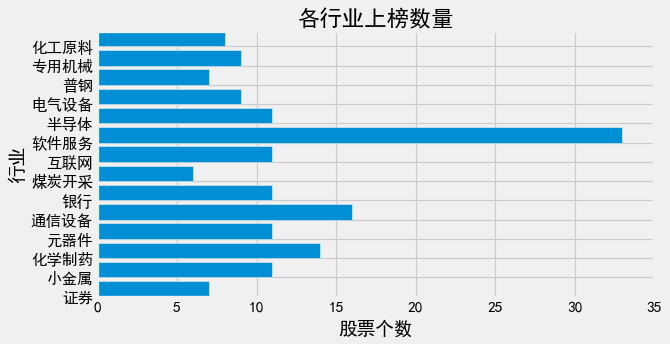

In [49]:
make_plot(count_amount)

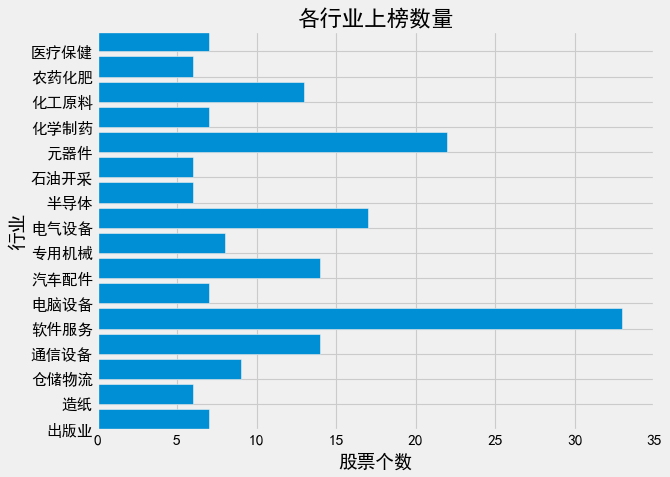

In [47]:
make_plot(count_percent)